### Import libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Look at the big picture

Your model should learn from this data and be able to predict the Priceof a house in in any Suburn, given all the other metrics.

Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

### Get the data

In [3]:
# Import our csv file and store it as the varibale 'df'
df = pd.read_csv('melb_data.csv')
# Turn of mac columns, so we can view the entire width of the dataframe
pd.set_option('max_columns', None)
# Print number of columns by assessing shape tuple with index 0
print(f'Number of rows: {df.shape[0]}')
# Print number of columns by assessing shape tuple with index 1
print(f'Number of columns: {df.shape[1]}')
df.head()

Number of rows: 13580
Number of columns: 21


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

There are 4 columns with missing values. We have to treat these before we progress. 

I will use a Sklearn Imputation method to addresses the continuous/numerical columns. However, I need to be a bit more creative with the Categorical column CouncilArea. 

### Backfill missing values

In [52]:
burbs_and_cas = df[['Suburb', 'CouncilArea']]
a = set(df['Suburb'])
burbs_and_cas.dropna(how='all', inplace=True)
b = set(df['Suburb'])
if a==b:
    burbs_and_cas.drop_duplicates(
        subset=['Suburb'],
        keep='first',
        inplace=True
    )
    
    df_filled = df.merge(
        burbs_and_cas,
        left_on = 'Suburb',
        right_on= 'Suburb',
        how = 'inner',
    )
    
    df_filled.drop(
    columns=['CouncilArea_x'],
    inplace=True
    )
    # This drops 7 rows from out dataset
    df_filled = df_filled[df_filled['CouncilArea_y'].notna()]

    
df_filled.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13573 entries, 0 to 13572
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13573 non-null  object 
 1   Address        13573 non-null  object 
 2   Rooms          13573 non-null  int64  
 3   Type           13573 non-null  object 
 4   Price          13573 non-null  float64
 5   Method         13573 non-null  object 
 6   SellerG        13573 non-null  object 
 7   Date           13573 non-null  object 
 8   Distance       13573 non-null  float64
 9   Postcode       13573 non-null  float64
 10  Bedroom2       13573 non-null  float64
 11  Bathroom       13573 non-null  float64
 12  Car            13511 non-null  float64
 13  Landsize       13573 non-null  float64
 14  BuildingArea   7126 non-null   float64
 15  YearBuilt      8202 non-null   float64
 16  Lattitude      13573 non-null  float64
 17  Longtitude     13573 non-null  float64
 18  Region

**Cleaning empty data**

In [50]:
df_filled['index'] = df_filled.index
to_impute = df_filled[['BuildingArea', 'YearBuilt', 'Car']]

from sklearn.impute import SimpleImputer
# Create an Instance of the SimpleImputer class
my_imputer = SimpleImputer()
# Impute data
imputed = my_imputer.fit_transform(to_impute)
imputed

array([[1.45745908e+02, 1.96467252e+03, 1.00000000e+00],
       [7.90000000e+01, 1.90000000e+03, 0.00000000e+00],
       [1.50000000e+02, 1.90000000e+03, 0.00000000e+00],
       ...,
       [1.89000000e+02, 2.01000000e+03, 2.00000000e+00],
       [8.17900000e+01, 1.98000000e+03, 0.00000000e+00],
       [1.49000000e+02, 1.99600000e+03, 1.00000000e+00]])

In [5]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


<AxesSubplot:ylabel='Regionname,Regionname'>

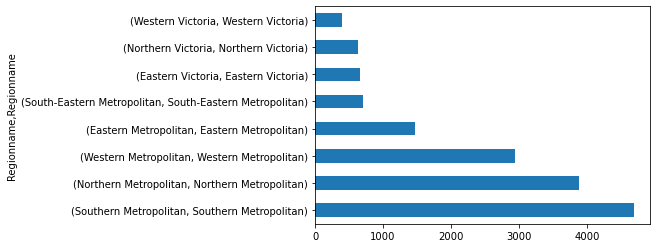

In [12]:
df.groupby(['SellerG'])['SellerG'].value_counts().nlargest(10).plot(kind='barh')
df.groupby(['Regionname'])['Regionname'].value_counts().nlargest(10).plot(kind='barh')

In [7]:
y = df['Price']
X = df.drop(columns=['Price', 'YearBuilt', 'BuildingArea'], axis=1)
X

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
11958,Craigieburn,10 Olympic Wy,4,h,S,YPA,29/07/2017,20.6,3064.0,4.0,2.0,2.0,512.0,Hume,-37.58505,144.93592,Northern Metropolitan,15510.0
5667,South Yarra,6/49 Osborne St,1,u,VB,Jellis,18/03/2017,3.3,3141.0,1.0,1.0,0.0,0.0,Stonnington,-37.84370,144.99040,Southern Metropolitan,14887.0
12263,Coburg,60 Woiwurung Cr,2,t,S,Brad,3/09/2017,6.7,3058.0,2.0,2.0,1.0,1965.0,NaN,-37.73615,144.97455,Northern Metropolitan,11204.0
12809,Oakleigh South,19 Luntar Rd,3,h,PI,Ray,16/09/2017,15.5,3167.0,3.0,1.0,2.0,660.0,NaN,-37.92745,145.08276,South-Eastern Metropolitan,3692.0
3219,Hawthorn,109/311 Burwood Rd,1,u,PI,Wood,28/08/2016,4.6,3122.0,1.0,1.0,1.0,0.0,Boroondara,-37.82220,145.03290,Southern Metropolitan,11308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,Reservoir,30 Kinsale St,3,h,S,Nelson,22/08/2016,11.2,3073.0,3.0,1.0,1.0,0.0,Darebin,-37.72170,144.99540,Northern Metropolitan,21650.0
13418,Fitzroy North,134 Clauscen St,2,h,S,Nelson,26/08/2017,3.6,3068.0,2.0,1.0,1.0,164.0,NaN,-37.77796,144.98374,Northern Metropolitan,6244.0
5390,Richmond,23a Dickmann St,3,t,PI,Jellis,22/08/2016,2.6,3121.0,3.0,1.0,1.0,383.0,Yarra,-37.82480,144.99760,Northern Metropolitan,14949.0
860,Bentleigh East,21 Highview Rd,2,h,S,Buxton,16/04/2016,13.9,3165.0,2.0,2.0,1.0,201.0,Glen Eira,-37.92930,145.06570,Southern Metropolitan,10969.0


### Discover and visualise the data to gain insights

<AxesSubplot:xlabel='Longtitude', ylabel='Lattitude'>

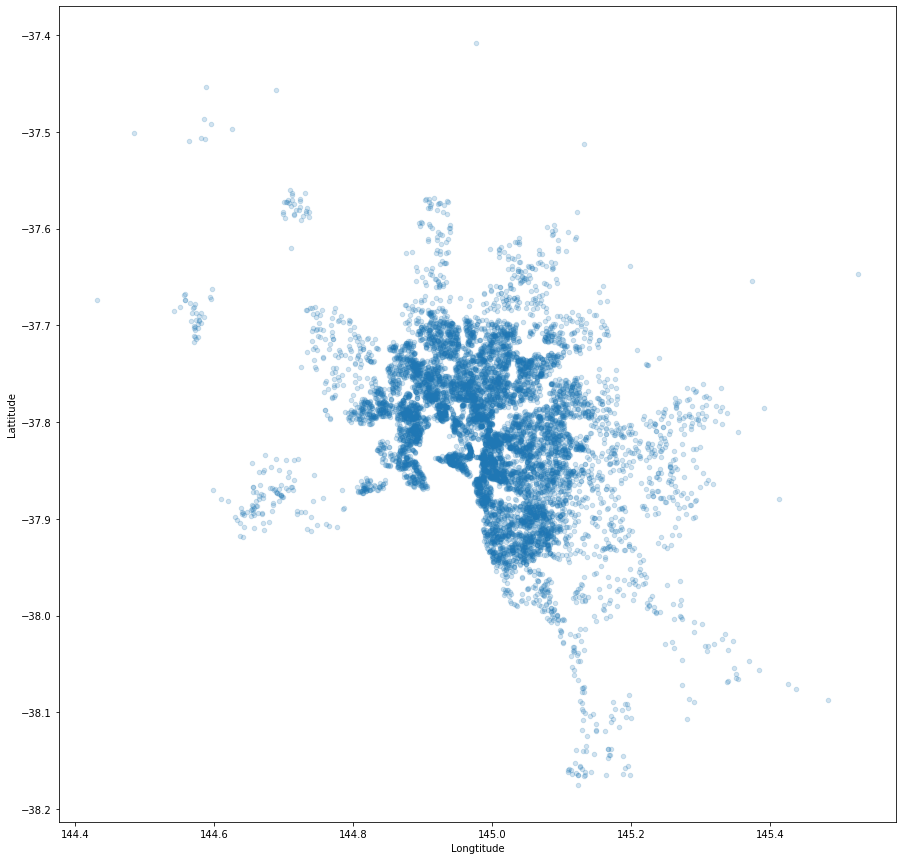

In [9]:
X_train.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=.2, figsize=(15,15))

array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Distance'}>,
        <AxesSubplot:title={'center':'Postcode'}>],
       [<AxesSubplot:title={'center':'Bedroom2'}>,
        <AxesSubplot:title={'center':'Bathroom'}>,
        <AxesSubplot:title={'center':'Car'}>,
        <AxesSubplot:title={'center':'Landsize'}>],
       [<AxesSubplot:title={'center':'BuildingArea'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'Lattitude'}>,
        <AxesSubplot:title={'center':'Longtitude'}>],
       [<AxesSubplot:title={'center':'Propertycount'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

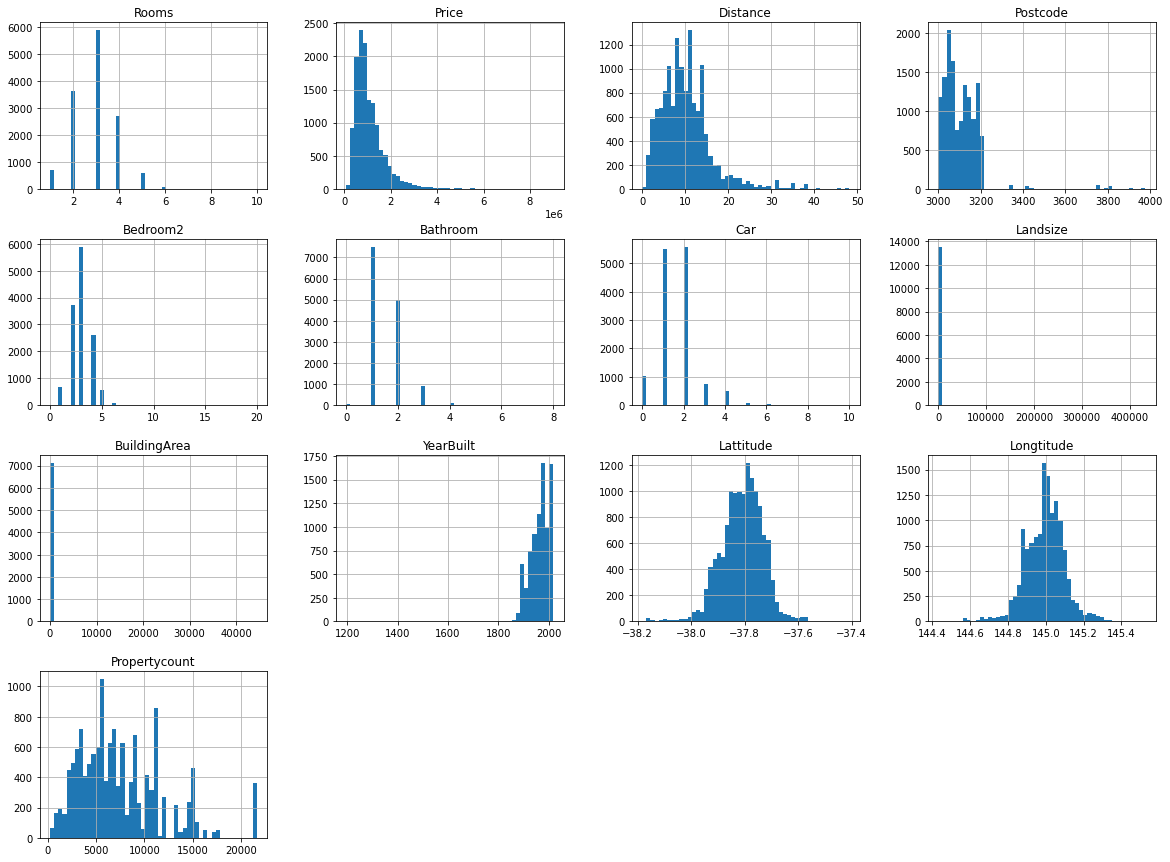

In [10]:
df.hist(
    bins=50,
    figsize=(20,15))

C:\Users\dev_env\AppData\Local\Temp/ipykernel_24708/533803655.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


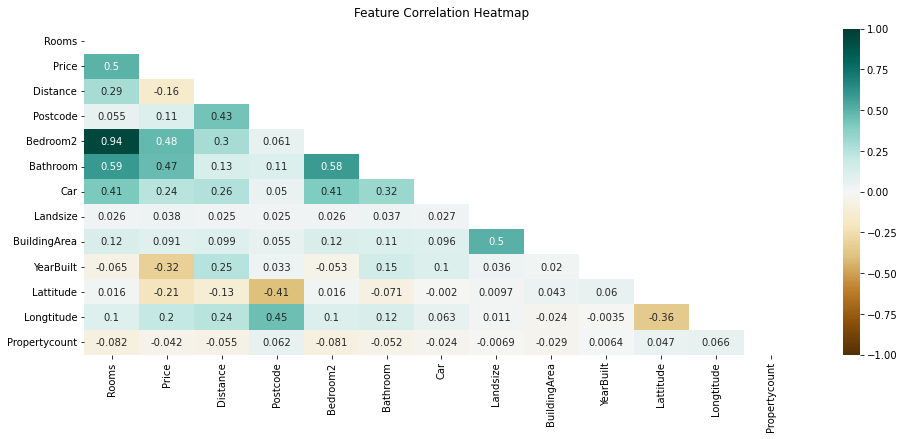

In [11]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Feature Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

##### Data Preprocessing (preparing the data for the ML algorithms)

##### Select a model and train it

##### Fine-tune your model

##### Present your solution

##### Launch, monitor and maintain your system